In [1]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Open csv file as a Pandas DataFrame
df = pd.read_csv('stroke_data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Cleaning


In [7]:
#Duplicates
df.duplicated().sum()

0

In [8]:
df = df.drop_duplicates()

In [9]:
#Missing Values
df.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Haven't yet converted column data types. (Insert code below)

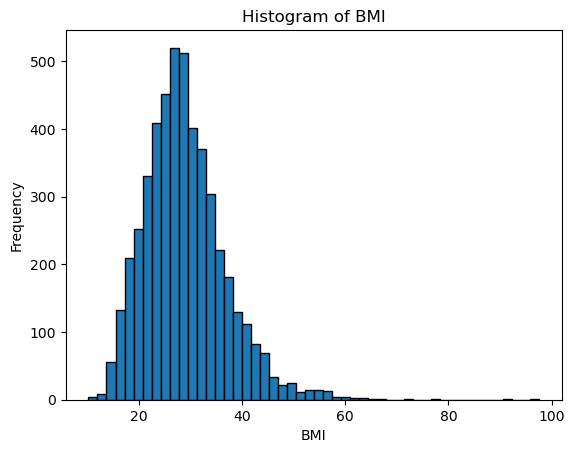

In [11]:
#Checking frequency of BMI 
#Info will be used to handle Nan values

plt.hist(df['bmi'].dropna(), bins=50, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()



In [12]:
# Checking Mean and Median of bmi values

print(df['bmi'].mean())
print(df['bmi'].median())

28.893236911794666
28.1


In [13]:
# Replacing nan value with value closest to median,mode and mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True) 
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# Checking unique values
df['work_type'].value_counts()
#df['ever_married'].value_counts()
#df['Residence_type'].value_counts()
#df['smoking_status'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

### Exploratory Data Analysis (EDA):

In [15]:
#Generate descriptive statistics for numerical columns (mean, median, std, etc.).
# id, age, glucose level, bmi
selected_columns = ['age', 'avg_glucose_level', 'bmi' ]
for column in selected_columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    std_value = df[column].std()

    print(f"\nStatistics for {column}:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_value}")



Statistics for age:
Mean: 43.226614481409
Median: 45.0
Standard Deviation: 22.61264672311352

Statistics for avg_glucose_level:
Mean: 106.1476771037182
Median: 91.88499999999999
Standard Deviation: 45.28356015058203

Statistics for bmi:
Mean: 28.893236911794663
Median: 28.4
Standard Deviation: 7.698017826857077


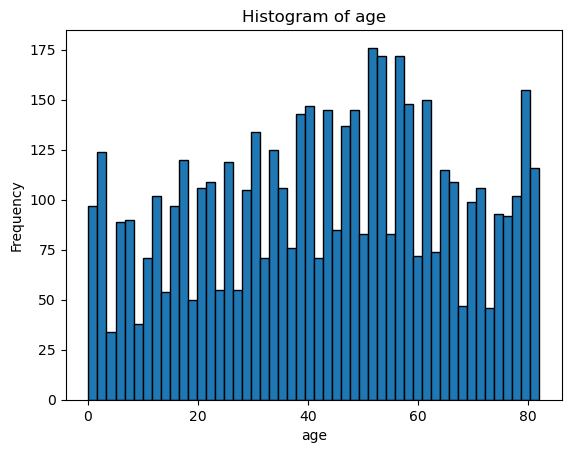

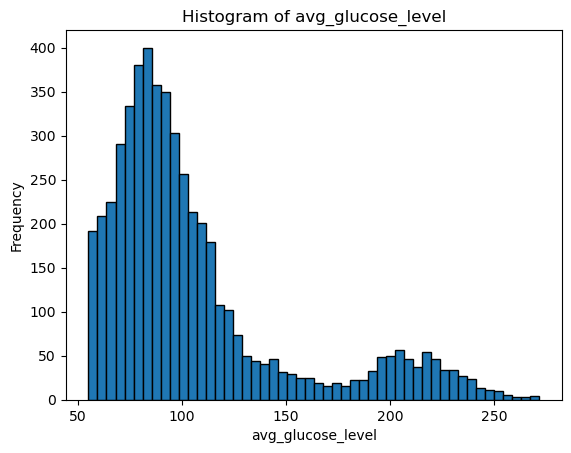

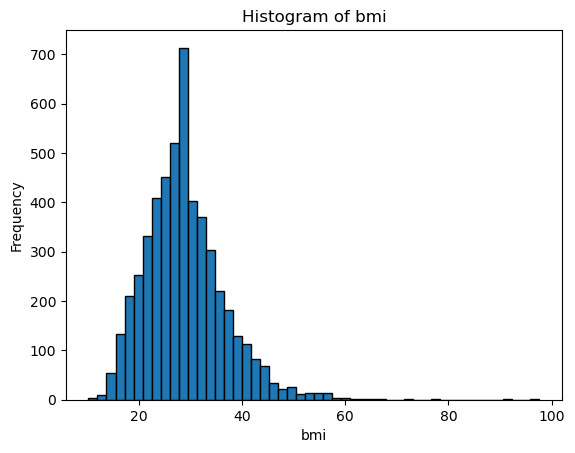

In [16]:
for column in selected_columns:
    plt.hist(df[column].dropna(), bins=50, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

#### For all cells below that contain more than one countplot code, the code for some plots may need to be commented out 
#### before the other countplots may be displayed. Boxplots are not affected.

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


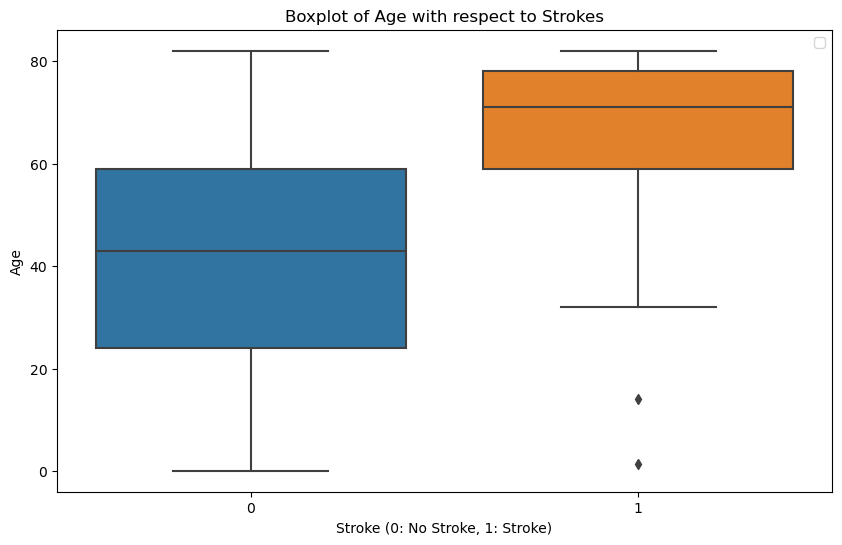

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a boxplot for 'age' with respect to strokes
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Boxplot of Age with respect to Strokes')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Age')
plt.legend()
plt.show()




C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: 'numpy.int64' object has no attribute 'startswith'

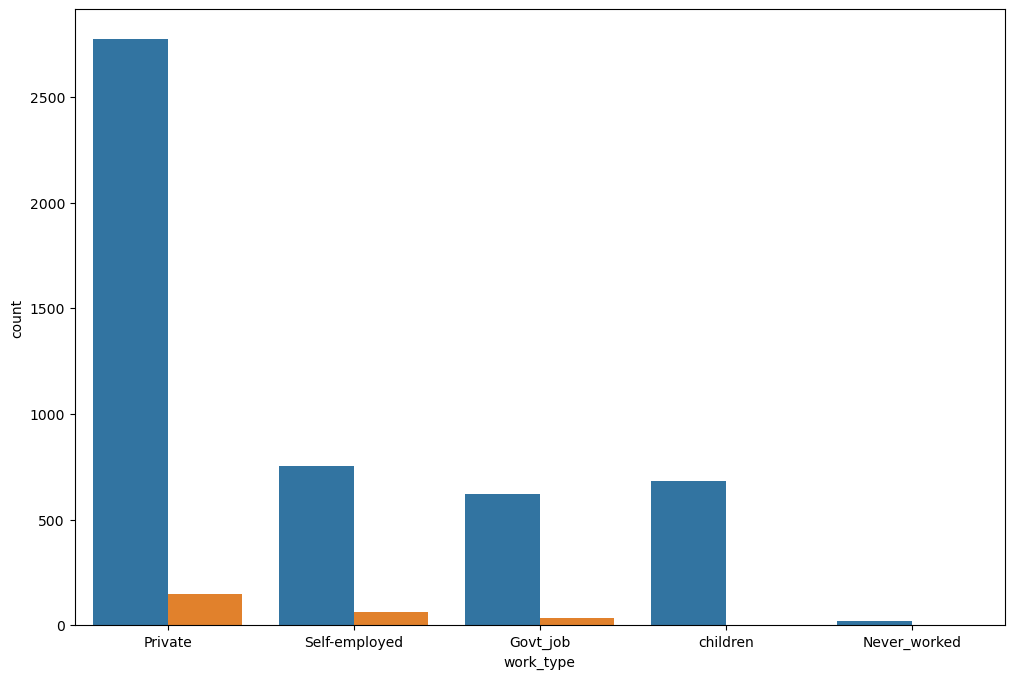

In [18]:

# Plotting a countplot for 'work_type' with respect to strokes
plt.figure(figsize=(12, 8))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Countplot of Work Type with respect to Strokes')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: 'numpy.int64' object has no attribute 'startswith'

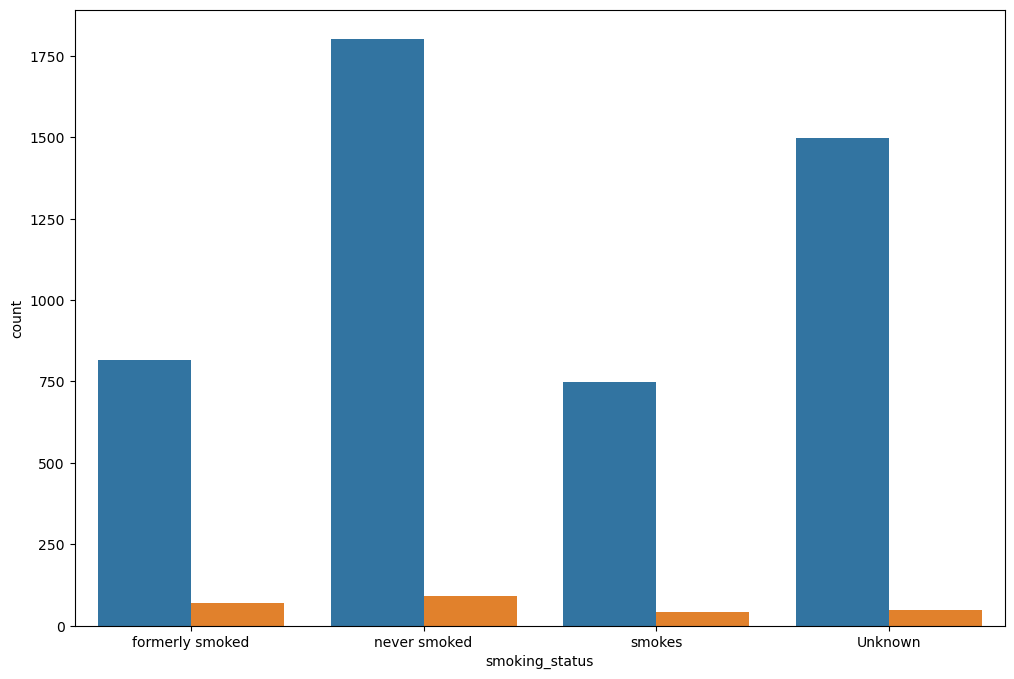

In [19]:
# Plotting a countplot for 'smoking_status' with respect to strokes
plt.figure(figsize=(12, 8))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Countplot of Smoking Status with respect to Strokes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


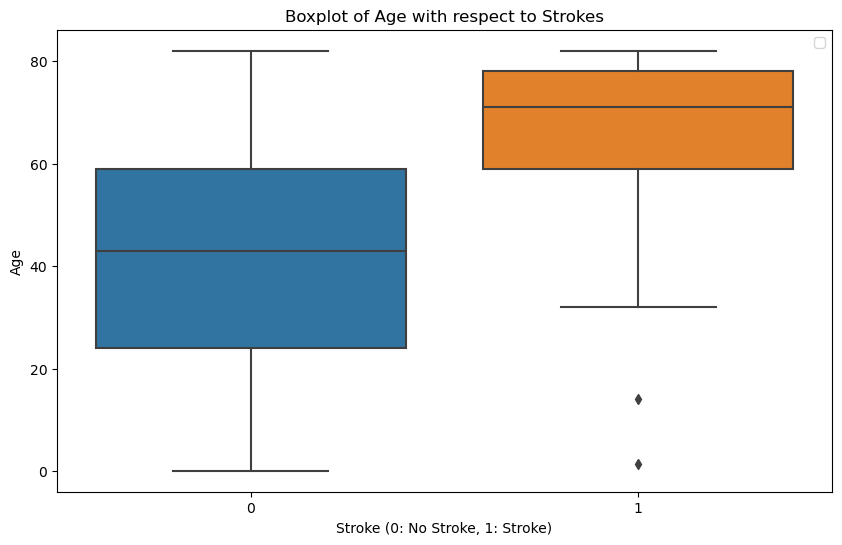

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: 'numpy.int64' object has no attribute 'startswith'

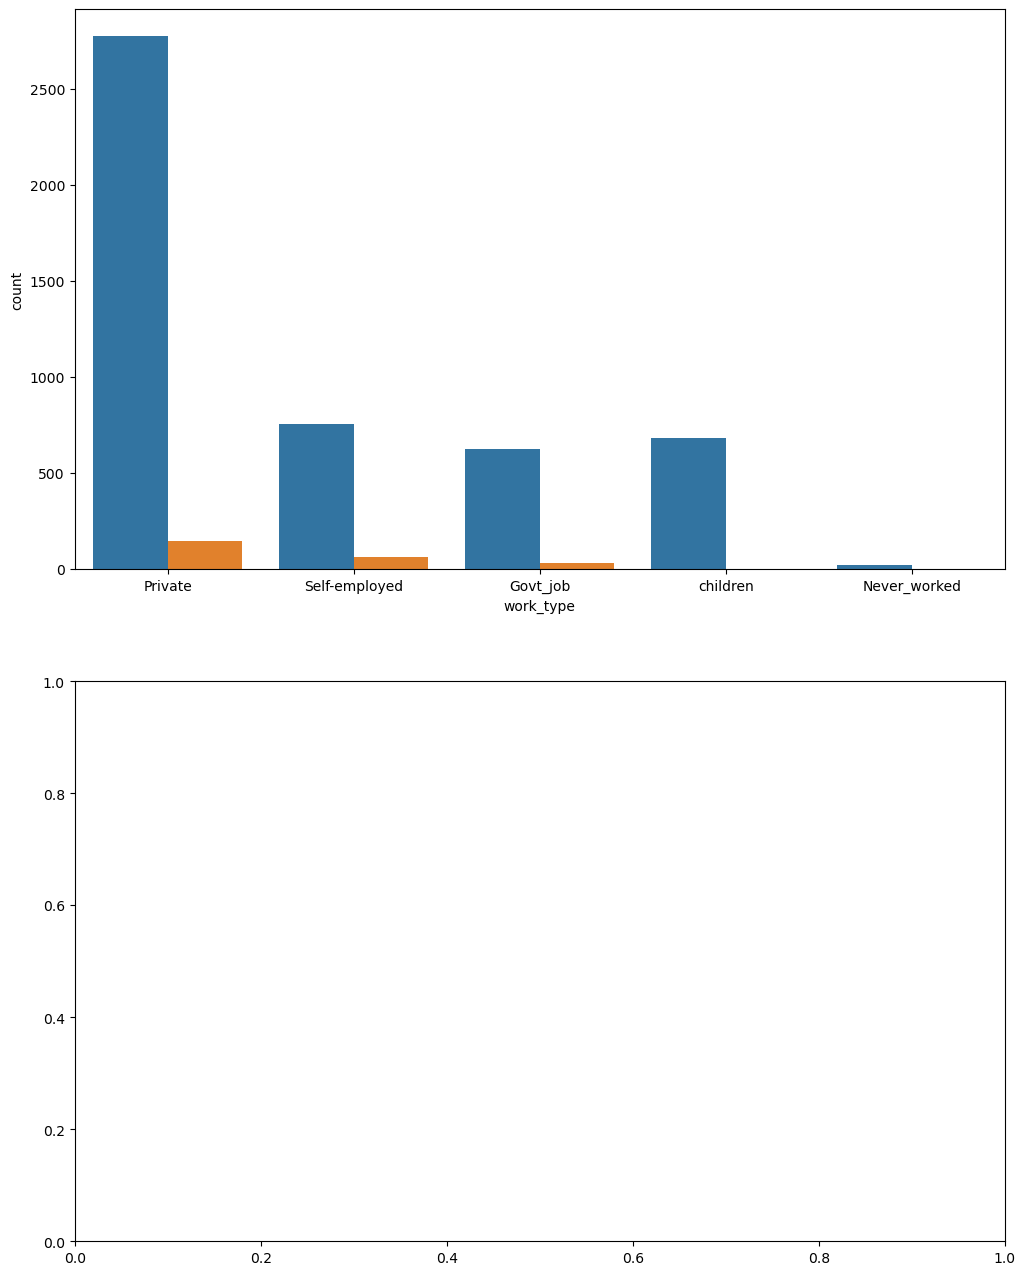

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a boxplot for 'age' with respect to strokes
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Boxplot of Age with respect to Strokes')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Age')
plt.legend()
plt.show()


# Plotting countplots for 'work_type' and 'smoking_status' with respect to strokes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Countplot for 'work_type'
sns.countplot(x='work_type', hue='stroke', data=df, ax=axes[0])
axes[0].set_title('Countplot of Work Type with respect to Strokes')
axes[0].set_xlabel('Work Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


# Countplot for 'smoking_status'
sns.countplot(x='smoking_status', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Countplot of Smoking Status with respect to Strokes')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.tight_layout()
plt.show()



### Explore the correlation between hypertension, heart_disease, and strokes.

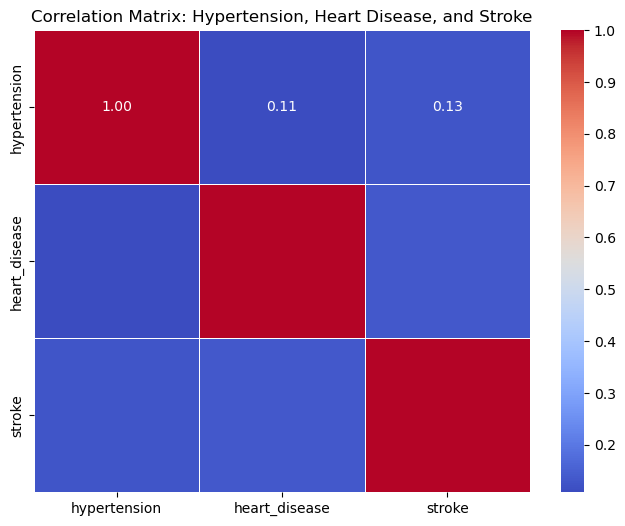

In [21]:
# Selecting relevant columns
selected_columns = ['hypertension', 'heart_disease', 'stroke']
correlation_df = df[selected_columns]
# Correlation matrix
correlation_matrix = correlation_df.corr()
# Visualizing using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Hypertension, Heart Disease, and Stroke')
plt.show()


### Identify and analyze any patterns or trends that might be interesting.

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: 'numpy.int64' object has no attribute 'startswith'

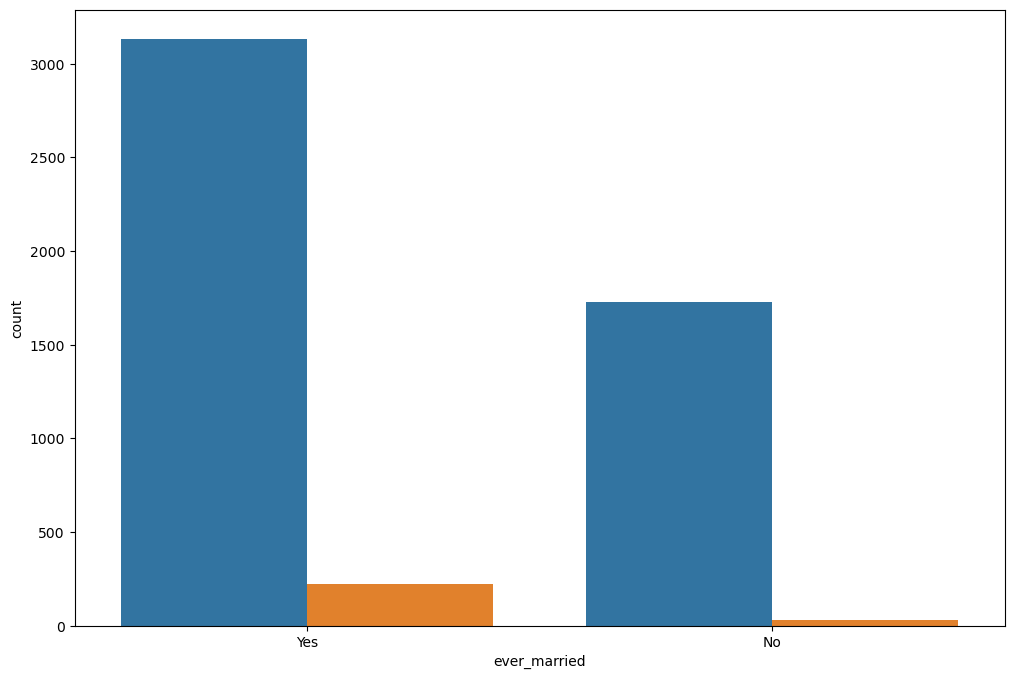

In [22]:
# Marriage and health conditions
# No significant relation with stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Countplot of Marriage Status with respect to Strokes')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()
#No significant relation with hypertension
plt.figure(figsize=(12, 8))
sns.countplot(x='ever_married', hue='hypertension', data=df)
plt.title('Countplot of Marriage Status with respect to hypertension')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No Hypertension', 'Hypertension'])
plt.show()
#No significant relation with heart disease
plt.figure(figsize=(12, 8))
sns.countplot(x='ever_married', hue='heart_disease', data=df)
plt.title('Countplot of Marriage Status with respect to heart disease')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: 'numpy.int64' object has no attribute 'startswith'

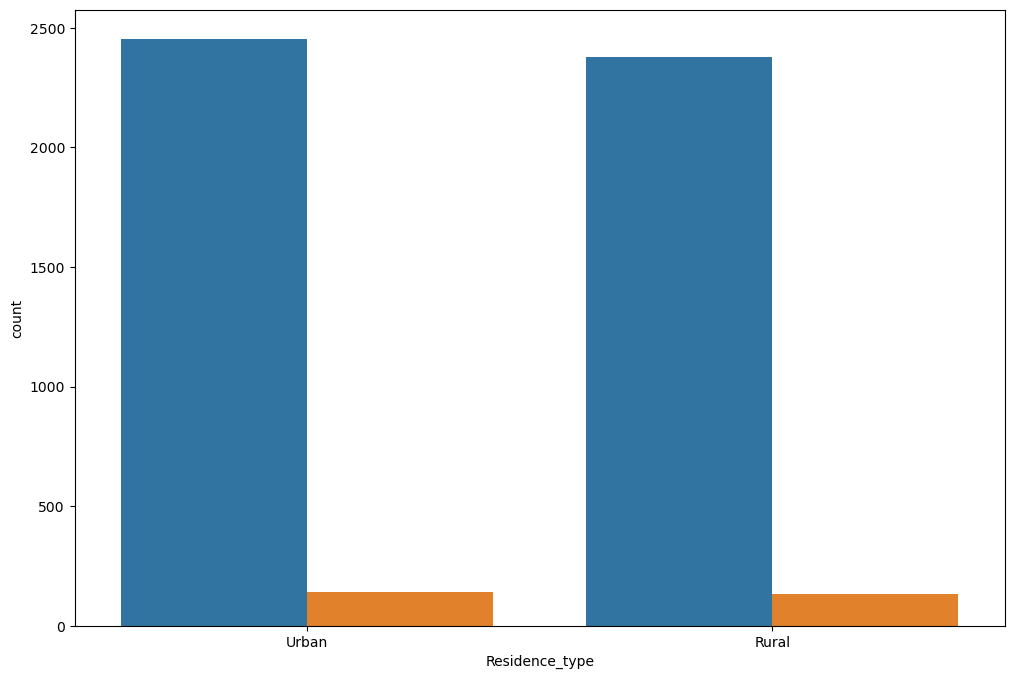

In [23]:
# Residence type and health conditions
# No significant relation with heart disease
plt.figure(figsize=(12, 8))
sns.countplot(x='Residence_type', hue='heart_disease', data=df)
plt.title('Countplot of Residence Type with respect to heart disease')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()
# Place of residence has no effect on work type
plt.figure(figsize=(12, 8))
sns.countplot(x='work_type', hue='Residence_type', data=df)
plt.title('Countplot of Work Type with Residence Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Residence', labels=['Urban', 'Rural'])
plt.show()

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


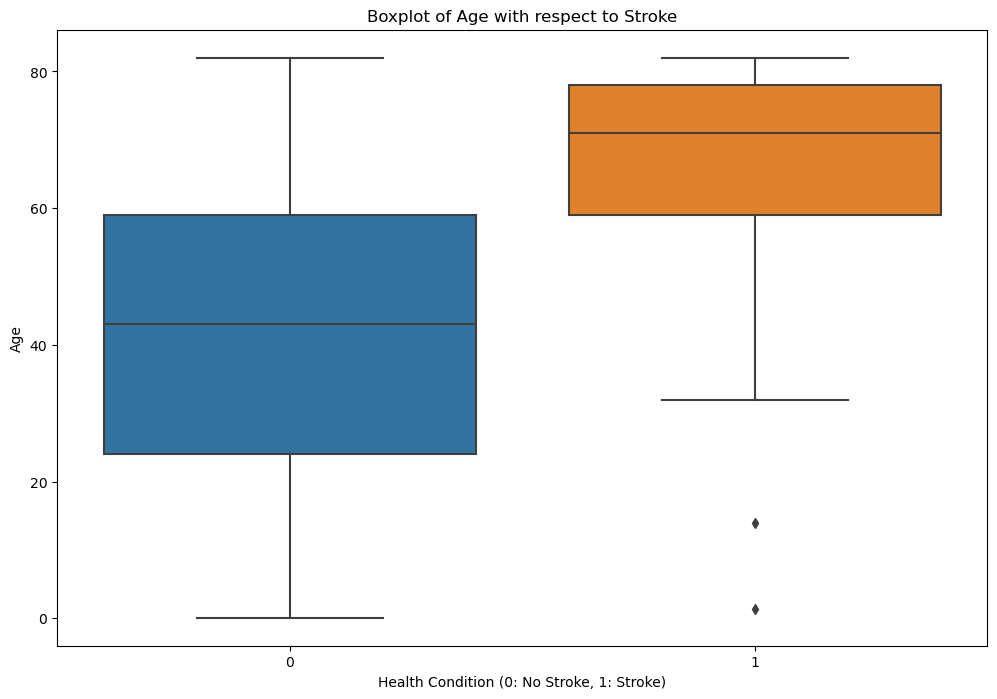

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

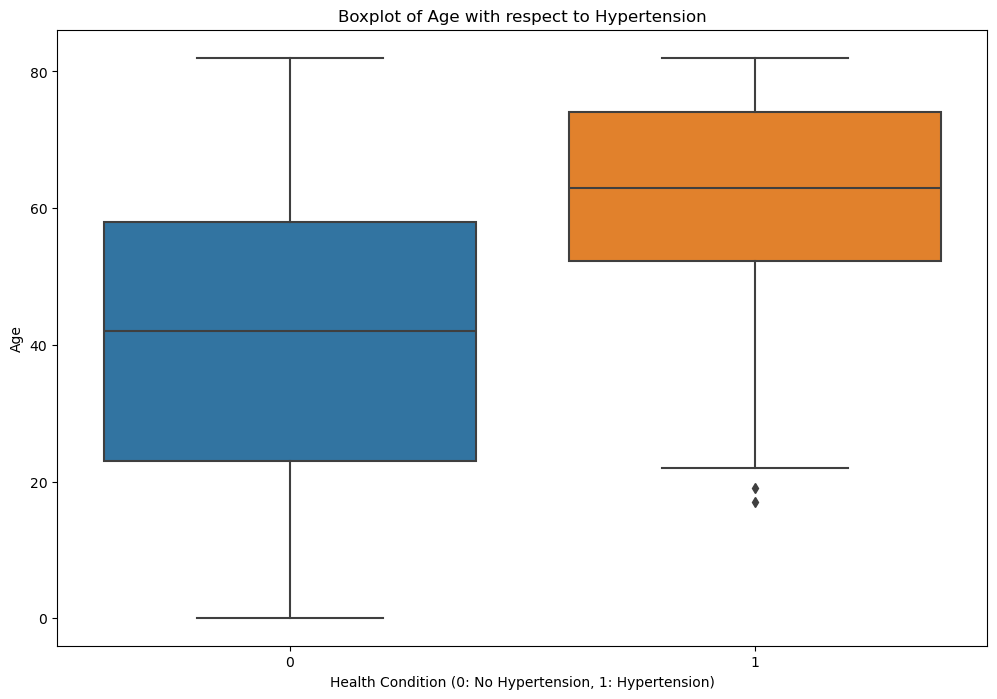

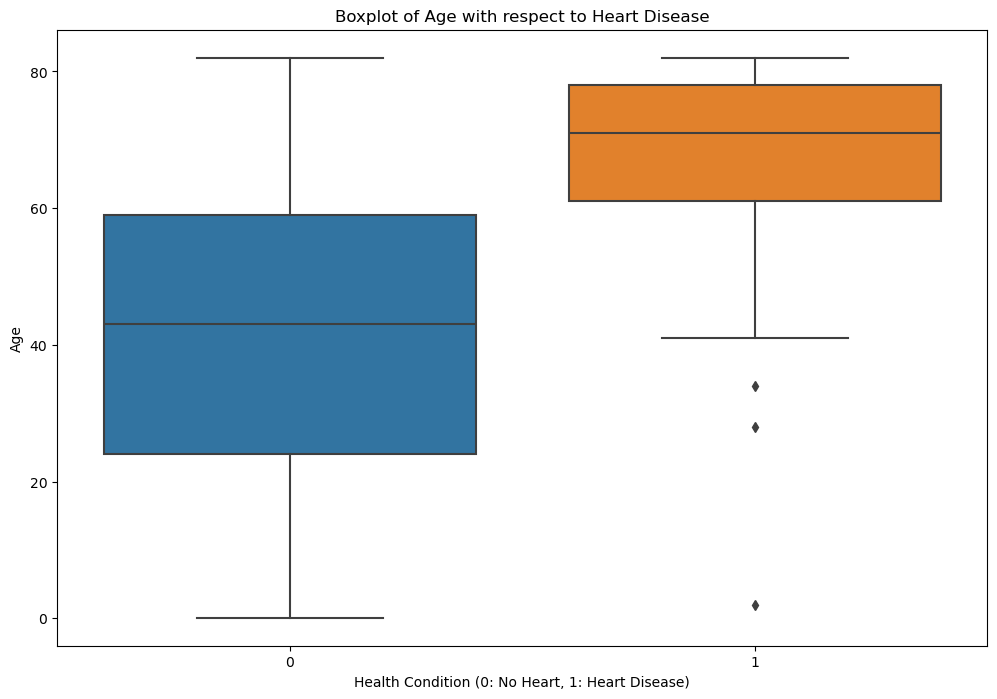

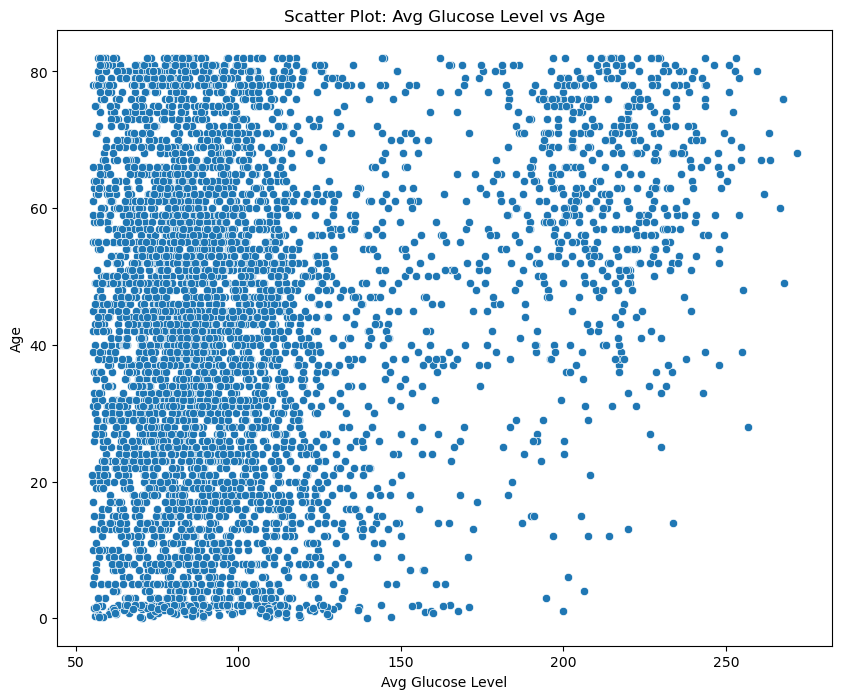

Correlation Coefficient: 0.23817111410174344


In [24]:
# Age and health condtions
plt.figure(figsize=(12, 8))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Boxplot of Age with respect to Stroke')
plt.xlabel('Health Condition (0: No Stroke, 1: Stroke)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='hypertension', y='age', data=df)
plt.title('Boxplot of Age with respect to Hypertension')
plt.xlabel('Health Condition (0: No Hypertension, 1: Hypertension)')
plt.ylabel('Age')
#plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title('Boxplot of Age with respect to Heart Disease')
plt.xlabel('Health Condition (0: No Heart, 1: Heart Disease)')
plt.ylabel('Age')
#plt.show()

# Scatter plot of 'avg_glucose_level' vs 'age' 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='avg_glucose_level', y='age', data=df)
plt.title('Scatter Plot: Avg Glucose Level vs Age')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Age')
plt.show()

correlation_coefficient = df['avg_glucose_level'].corr(df['age'])
print(f'Correlation Coefficient: {correlation_coefficient}')

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


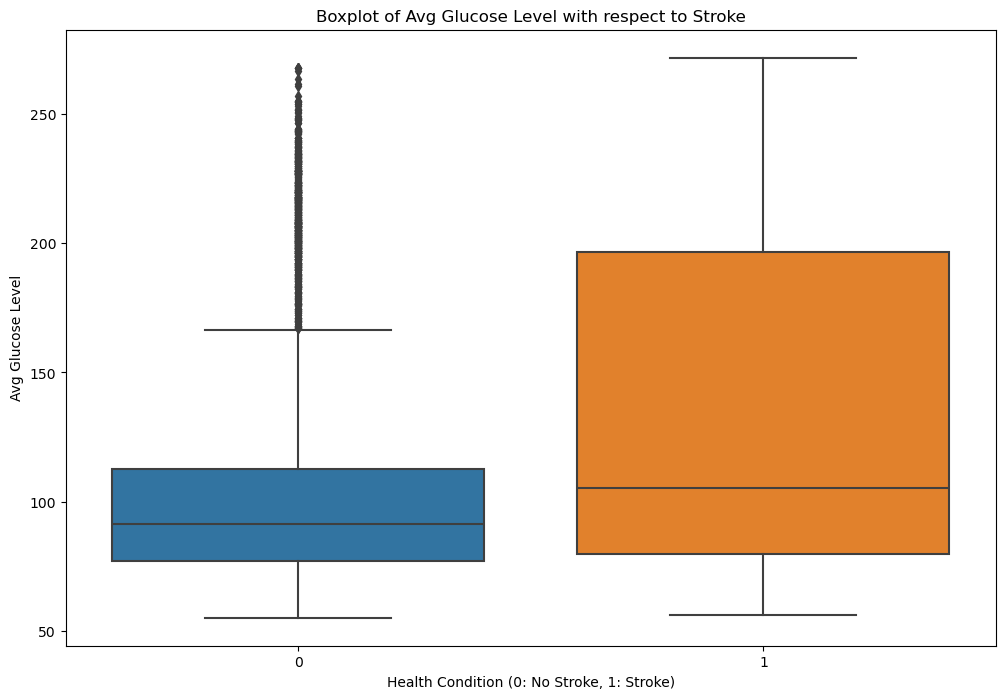

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

Text(0, 0.5, 'Avg Glucose Level')

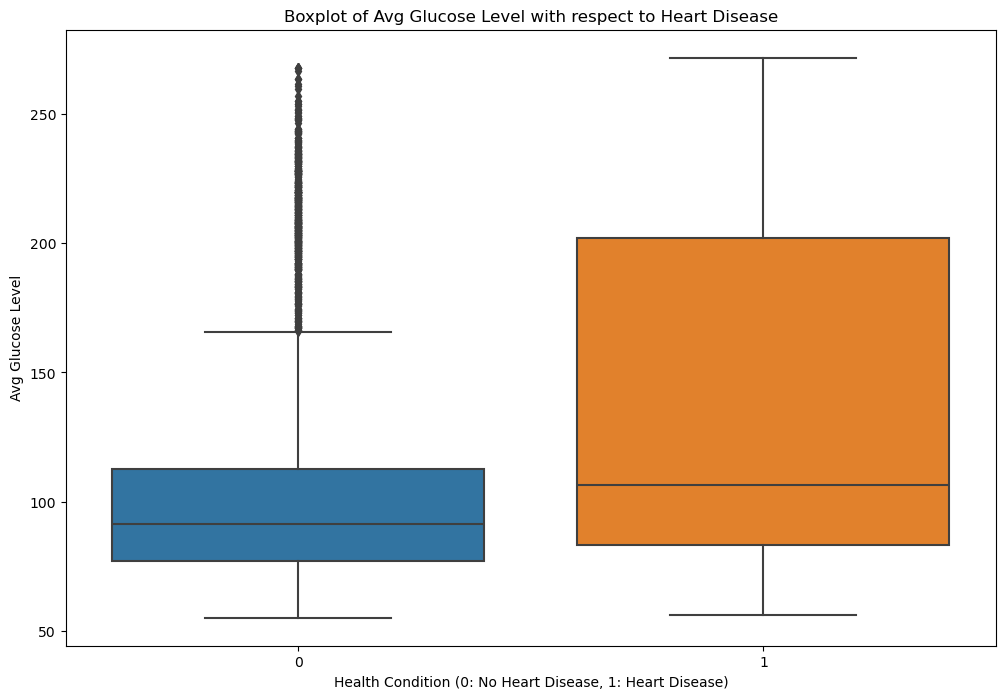

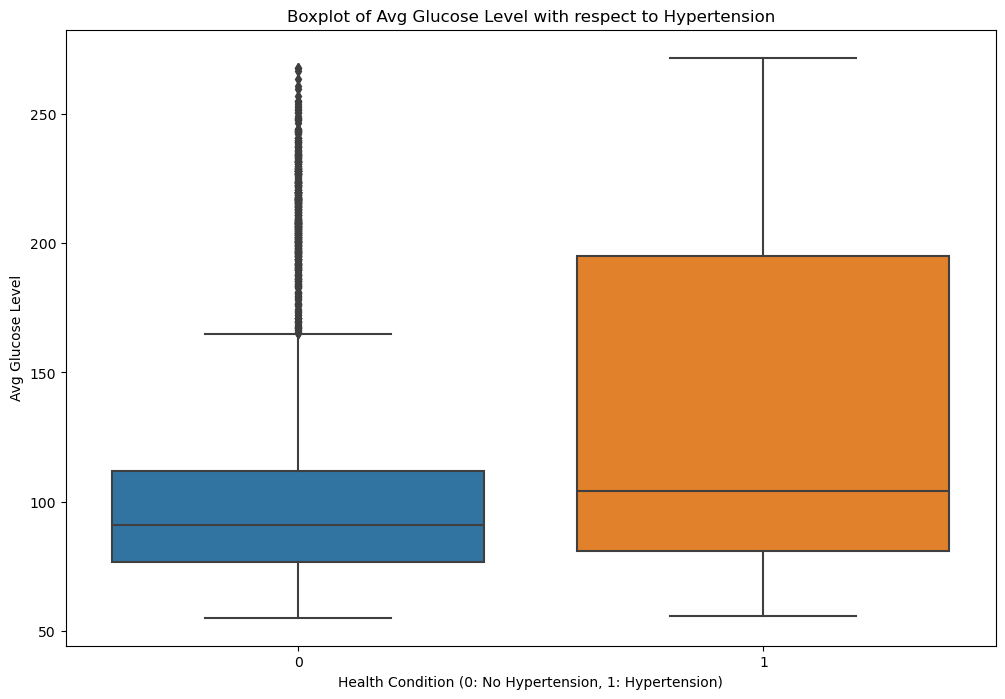

In [25]:
# Average glucose level and health conditions
# Boxplot of 'avg_glucose_level' with respect to stroke
# The results are interesting as higher glucose levels almost equals a higher chance of stroke
#   but there are a lot of outliers with people having a high glucose level but no strokes
plt.figure(figsize=(12, 8))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Boxplot of Avg Glucose Level with respect to Stroke')
plt.xlabel('Health Condition (0: No Stroke, 1: Stroke)')
plt.ylabel('Avg Glucose Level')
plt.show()

# Boxplot of 'avg_glucose_level' with respect to heart disease
# Results for the relation to heart disease are similar to the one with stroke as could probably be inference from the 
# correlation matrix
plt.figure(figsize=(12, 8))
sns.boxplot(x='heart_disease', y='avg_glucose_level', data=df)
plt.title('Boxplot of Avg Glucose Level with respect to Heart Disease')
plt.xlabel('Health Condition (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Avg Glucose Level')
#plt.show()

# Boxplot of 'avg_glucose_level' with respect to hypertension
# Results are the same as the other too. Some outliers but a higher glucose level almost always guarantees a health condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='hypertension', y='avg_glucose_level', data=df)
plt.title('Boxplot of Avg Glucose Level with respect to Hypertension')
plt.xlabel('Health Condition (0: No Hypertension, 1: Hypertension)')
plt.ylabel('Avg Glucose Level')
#plt.show()



C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


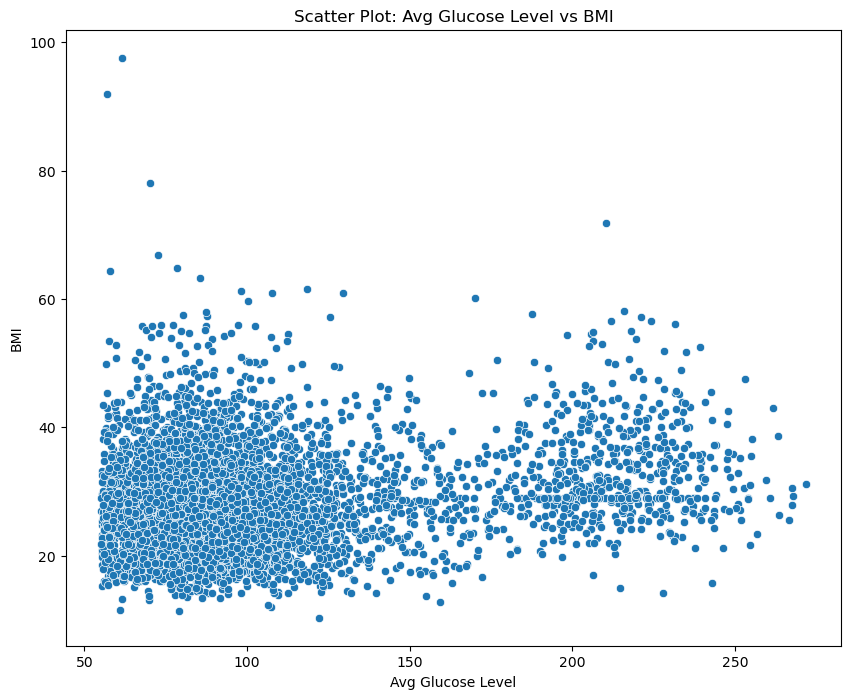

Correlation Coefficient: 0.1687513512260399


In [26]:
# Scatter plot of 'avg_glucose_level' vs 'bmi'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df)
plt.title('Scatter Plot: Avg Glucose Level vs BMI')
plt.xlabel('Avg Glucose Level')
plt.ylabel('BMI')
plt.show()

correlation_coefficient = df['avg_glucose_level'].corr(df['bmi'])
print(f'Correlation Coefficient: {correlation_coefficient}')






C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


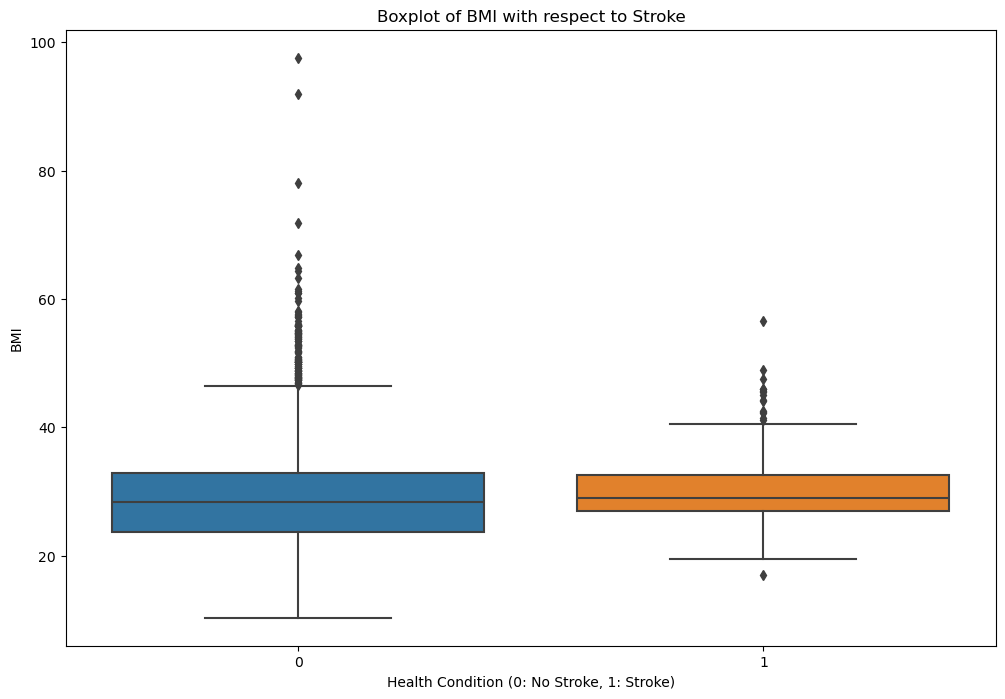

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

Text(0, 0.5, 'BMI')

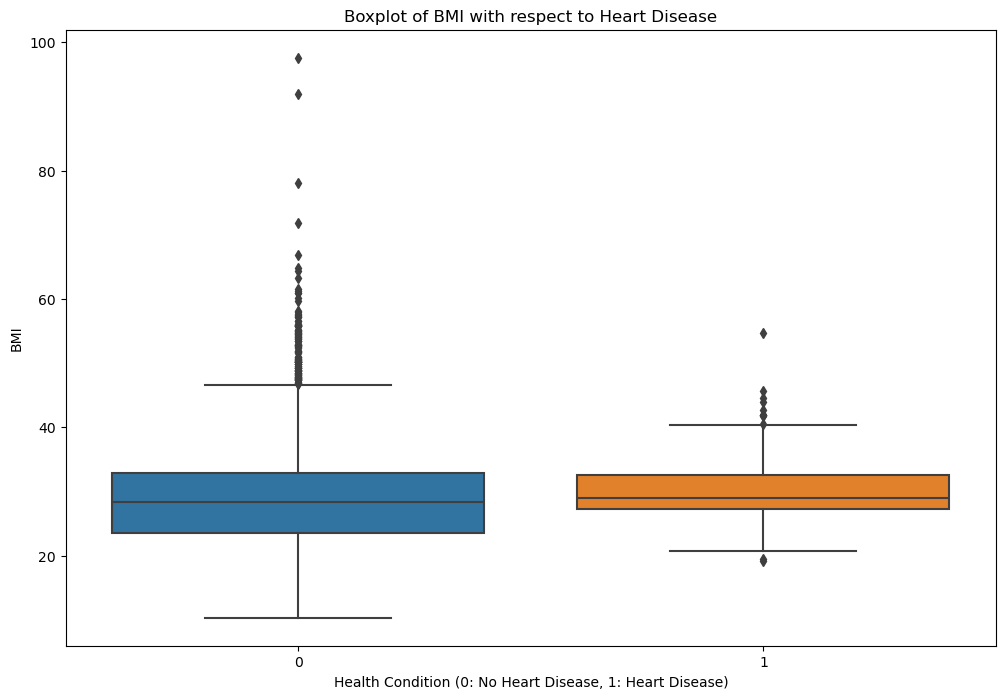

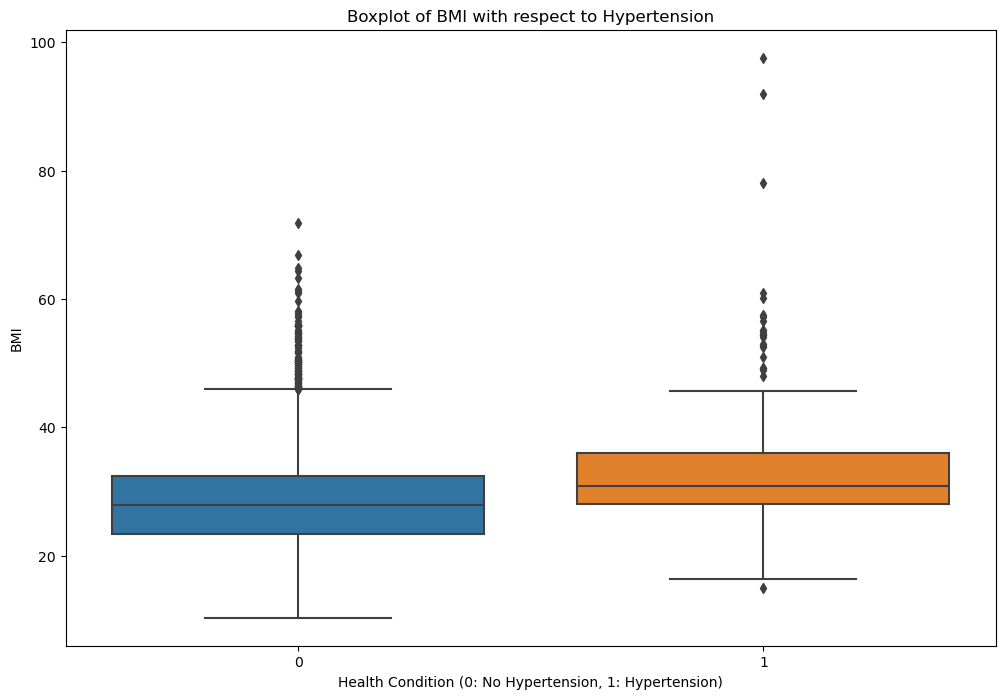

In [27]:
# Average bmi and health conditions
# Boxplot of 'bmi' with respect to stroke

plt.figure(figsize=(12, 8))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('Boxplot of BMI with respect to Stroke')
plt.xlabel('Health Condition (0: No Stroke, 1: Stroke)')
plt.ylabel('BMI')
plt.show()

# Boxplot of 'bmi' with respect to heart disease

plt.figure(figsize=(12, 8))
sns.boxplot(x='heart_disease', y='bmi', data=df)
plt.title('Boxplot of BMI with respect to Heart Disease')
plt.xlabel('Health Condition (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('BMI')
#plt.show()

# Boxplot of 'bmi' with respect to hypertension
plt.figure(figsize=(12, 8))
sns.boxplot(x='hypertension', y='bmi', data=df)
plt.title('Boxplot of BMI with respect to Hypertension')
plt.xlabel('Health Condition (0: No Hypertension, 1: Hypertension)')
plt.ylabel('BMI')
#plt.show()

# Hard to use BMI to determine risk of health conditions. As a healthy BMI is determined by a person's age, height and weight
#  of which we only have age


### Use any tool i.e. groupby, pivot tables and crosstab to perform any additional analyses that you find relevant.


In [28]:
average_glucose_by_gender_smoking = df.groupby(['gender', 'smoking_status'])['avg_glucose_level'].mean()
print(average_glucose_by_gender_smoking)


gender  smoking_status 
Female  Unknown             98.049306
        formerly smoked    104.599874
        never smoked       106.793263
        smokes             107.161062
Male    Unknown            101.434407
        formerly smoked    122.522629
        never smoked       108.975852
        smokes             109.166053
Other   formerly smoked    143.330000
Name: avg_glucose_level, dtype: float64


In [29]:
gender_hypertension_crosstab = pd.crosstab(df['gender'], df['hypertension'])
print(gender_hypertension_crosstab)


hypertension     0    1
gender                 
Female        2718  276
Male          1893  222
Other            1    0


In [30]:
analysis_columns= ['hypertension', 'heart_disease', 'smoking_status', 'gender', 'stroke', 'work_type', 'Residence_type']
value_counts = [df[column].value_counts() for column in analysis_columns]
value_counts
    

[hypertension
 0    4612
 1     498
 Name: count, dtype: int64,
 heart_disease
 0    4834
 1     276
 Name: count, dtype: int64,
 smoking_status
 never smoked       1892
 Unknown            1544
 formerly smoked     885
 smokes              789
 Name: count, dtype: int64,
 gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 stroke
 0    4861
 1     249
 Name: count, dtype: int64,
 work_type
 Private          2925
 Self-employed     819
 children          687
 Govt_job          657
 Never_worked       22
 Name: count, dtype: int64,
 Residence_type
 Urban    2596
 Rural    2514
 Name: count, dtype: int64]

### FINAL NOTES!
## Sample Population Overview
# The dataset primarily consists of demographic information such as age, gender, work type, BMI, hypertension, heart disease, smoking status, average glucose level, and stroke occurrence.
# The data has been cleaned and missing values imputed. Outliers were not addressed in analysis as it was not deemed necessary as they were few and it was health data.
# In the data Gender and Residence Type were evenly distributed with Residence being more even. Work Type contained various sectors with most working in the private sector. In the smoking status majority never smoked and non_smokers make up most of the data. With strokes being the data most referenced it is heavily skewed with a high percentage never having had a stroke.

## Data Analysis
# Correlation Analysis
# Significant correlations were observed between some variables (age and glucose, bmi and glucose) and a correlation heatmap between (Hypertension, Heart Disease and Stroke)- where the correlation was fairly similar between each variable.

# Visualizations
# Various visualizations, including histograms and countplots, were created to explore the distribution of variables and the relationship between health conditions and other factors.

# Insights
# Age
# Age is positively correlated with stroke, hypertension and heart disease, which is expected.
# Glucose
# Average glucose level shows some correlation with age, stroke, hypertension, and heart disease, which is mostly positive.
# BMI
# BMI shows some correlation with age, stroke, hypertension, and heart disease, with people at a certain BMI range having a 50/50 chance of developing a health condition
# Marriage and Resudence Type
# These two variables have no observeable correlation with the aforementioned health conditions.
# Strokes 
## 
The dataset contains a relatively small number of stroke case .
Further investigation into factors contributing to strokes, such as age, hypertension, and heart disease, may be insightf

## Recommendations
# Given the imbalanced distribution of stroke cases, conduct a more in-depth analysis to identify factors contributing to strokes. Consider applying techniques to handle class imbalance in machine learning models.ul.


